In [1]:
%display latex
t = var('t')
var('L, C, t0, q0, I0')
q = function('q')(t)
assume(L>0)
assume(C>0)
assume(t>0)
LC = L*diff(q,t,2)+q/C == 0;LC

L*diff(q(t), t, t) + q(t)/C == 0

In [2]:
LC_0 = desolve(LC, q, ivar=t);LC_0

_K2*cos(t/(sqrt(C)*sqrt(L))) + _K1*sin(t/(sqrt(C)*sqrt(L)))

In [3]:
q_LC = desolve(LC, q, ivar=t, ics=[t0,q0,I0])

In [4]:
I=diff(q_LC, t, 1);UL = L*diff(I,t,1)


In [5]:
qLC=q_LC.substitute(t0=0, q0=1e-6, I0=0, L=12e-2, C=1.5e-6);

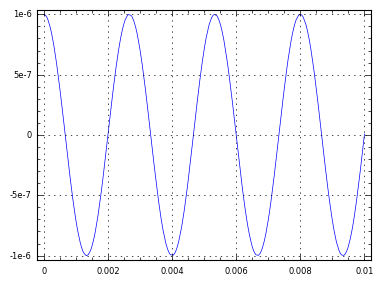

In [6]:
show(plot(qLC, (0, 0.01),thickness=0.5),
     figsize=4,gridlines="major",
     frame=True,fontsize=6,axes=False)

In [7]:
#show(plot(Imax(L=L, C=C, R=R, E0=E0),(f,1e1,fmax), color='violet', figsize=8))

In [8]:
@interact
def _(t0=0, q0=1e-6, I0=0, L=slider(1e-3,1e0,0.01,10e-2),
      C=slider(1e-6,1e-5,1e-7, 1.5e-6), tmax=1e-2):
    show(plot(qLC(t0=t0, q0=q0, I0=I0, L=L, C=C),
              (t,0,tmax),thickness=0.5, color='blue',axes=True,
              figsize=3),gridlines="major",frame=True,fontsize=6)